## 01/ Preprocessing

In [30]:
import pandas as pd

# Read the XLSX file
data_2010 = pd.read_excel("data_retail.xlsx",sheet_name="Year 2009-2010")
data_2011 = pd.read_excel("data_retail.xlsx",sheet_name="Year 2010-2011")

In [32]:
datas = [data_2010, data_2011]
data = pd.concat(datas, keys = ['09-10', '10-11'])
data

Invoice StockCode                          Description  Quantity  \
09-10 0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
      1       489434    79323P                   PINK CHERRY LIGHTS        12   
      2       489434    79323W                  WHITE CHERRY LIGHTS        12   
      3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
      4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...              ...       ...                                  ...       ...   
10-11 541905  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
      541906  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
      541907  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
      541908  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
      541909  581587      POST                              POSTAGE         1   

                     InvoiceDate  Price  Customer ID         Country  
09-10 0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
      1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
      2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
      3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
      4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
...                          ...    ...          ...             ...  
10-11 541905 2011-12-09 12:50:00   2.10      12680.0          France  
      541906 2011-12-09 12:50:00   4.15      12680.0          France  
      541907 2011-12-09 12:50:00   4.15      12680.0          France  
      541908 2011-12-09 12:50:00   4.95      12680.0          France  
      541909 2011-12-09 12:50:00  18.00      12680.0          France  

[1067371 rows x 8 columns]

### Attribute Information:

- InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

- Description: Product (item) name. Nominal.

- Quantity: The quantities of each product (item) per transaction. Numeric.

- InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.

- UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).

- CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

- Country: Country name. Nominal. The name of the country where a customer resides.

In [33]:
from ydata_profiling import ProfileReport

# Generate the profiling report
profile = ProfileReport(data, title="Profiling Report")

# Save the report as an HTML file
profile.to_file("profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [34]:
data.rename(index = str, \
              columns = {'Invoice' : 'invoice', \
                         'StockCode' : 'stock_code', \
                         'Quantity' : 'quantity', \
                         'InvoiceDate' : 'invoice_date', \
                         'Price' : 'unit_price', \
                         'Country' : 'country', \
                         'Description' : 'description', \
                         'Customer ID' : 'customer_id'}, inplace = True)
data

invoice stock_code                          description  \
09-10 0       489434      85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS   
      1       489434     79323P                   PINK CHERRY LIGHTS   
      2       489434     79323W                  WHITE CHERRY LIGHTS   
      3       489434      22041         RECORD FRAME 7" SINGLE SIZE    
      4       489434      21232       STRAWBERRY CERAMIC TRINKET BOX   
...              ...        ...                                  ...   
10-11 541905  581587      22899         CHILDREN'S APRON DOLLY GIRL    
      541906  581587      23254        CHILDRENS CUTLERY DOLLY GIRL    
      541907  581587      23255      CHILDRENS CUTLERY CIRCUS PARADE   
      541908  581587      22138        BAKING SET 9 PIECE RETROSPOT    
      541909  581587       POST                              POSTAGE   

              quantity        invoice_date  unit_price  customer_id  \
09-10 0             12 2009-12-01 07:45:00        6.95      13085.0   
      1             12 2009-12-01 07:45:00        6.75      13085.0   
      2             12 2009-12-01 07:45:00        6.75      13085.0   
      3             48 2009-12-01 07:45:00        2.10      13085.0   
      4             24 2009-12-01 07:45:00        1.25      13085.0   
...                ...                 ...         ...          ...   
10-11 541905         6 2011-12-09 12:50:00        2.10      12680.0   
      541906         4 2011-12-09 12:50:00        4.15      12680.0   
      541907         4 2011-12-09 12:50:00        4.15      12680.0   
      541908         3 2011-12-09 12:50:00        4.95      12680.0   
      541909         1 2011-12-09 12:50:00       18.00      12680.0   

                     country  
09-10 0       United Kingdom  
      1       United Kingdom  
      2       United Kingdom  
      3       United Kingdom  
      4       United Kingdom  
...                      ...  
10-11 541905          France  
      541906          France  
      541907          France  
      541908          France  
      541909          France  

[1067371 rows x 8 columns]

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice       525461 non-null  object        
 1   stock_code    525461 non-null  object        
 2   description   522533 non-null  object        
 3   quantity      525461 non-null  int64         
 4   invoice_date  525461 non-null  datetime64[ns]
 5   unit_price    525461 non-null  float64       
 6   customer_id   417534 non-null  float64       
 7   country       525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.1+ MB


In [37]:
data.isnull().sum().sort_values(ascending = False)

customer_id     243007
description       4382
invoice              0
stock_code           0
quantity             0
invoice_date         0
unit_price           0
country              0
dtype: int64

In [27]:
data.describe()

,quantity,unit_price,customer_id
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [38]:
# Calculate how many negative values of unit_price are present in retail. If they are only a small percentage of the total number of instances, then remove them from retail:
(data['unit_price'] <= 0).sum()

6207

In [39]:
# Similarly, find out the number of negative values of quantity:
(data['quantity'] <= 0).sum()

22950

In [41]:
# Display the total number of negative instances for the unit_price and quantity columns:
data[(data['unit_price'] <= 0) & (data['quantity'] <= 0) \
       & (data['customer_id'].isnull())]

invoice stock_code   description  quantity        invoice_date  \
09-10 263     489464      21733  85123a mixed       -96 2009-12-01 10:52:00   
      283     489463      71477         short      -240 2009-12-01 10:52:00   
      284     489467     85123A   21733 mixed      -192 2009-12-01 10:53:00   
      470     489521      21646           NaN       -50 2009-12-01 11:44:00   
      3114    489655      20683           NaN       -44 2009-12-01 17:26:00   
...              ...        ...           ...       ...                 ...   
10-11 535333  581210      23395         check       -26 2011-12-07 18:36:00   
      535335  581212      22578          lost     -1050 2011-12-07 18:38:00   
      535336  581213      22576         check       -30 2011-12-07 18:38:00   
      536910  581226      23090       missing      -338 2011-12-08 09:56:00   
      538925  581422      23169       smashed      -235 2011-12-08 15:24:00   

              unit_price  customer_id         country  
09-10 263            0.0          NaN  United Kingdom  
      283            0.0          NaN  United Kingdom  
      284            0.0          NaN  United Kingdom  
      470            0.0          NaN  United Kingdom  
      3114           0.0          NaN  United Kingdom  
...                  ...          ...             ...  
10-11 535333         0.0          NaN  United Kingdom  
      535335         0.0          NaN  United Kingdom  
      535336         0.0          NaN  United Kingdom  
      536910         0.0          NaN  United Kingdom  
      538925         0.0          NaN  United Kingdom  

[3457 rows x 8 columns]

<AxesSubplot: >

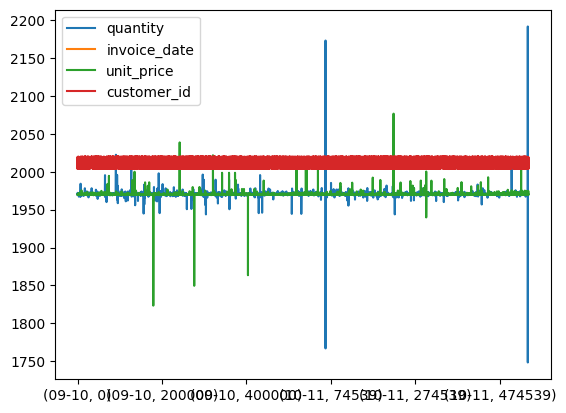

In [36]:
data.plot()

In [29]:
data['Customer ID'].astype(str)

KeyError: 'Customer ID'

## 02/ Data Analysis